In [1]:
import win32com.client as win32

# criar a integração com o outlook
outlook = win32.Dispatch('outlook.application')

# criar um email
email = outlook.CreateItem(0)

faturamento = 1500
qtde_produtos = 10
ticket_medio = faturamento / qtde_produtos

# configurar as informações do seu e-mail
email.To = "espeditoa100@gmail.com"
email.Subject = "E-mail automático do Python"
email.HTMLBody = f"""
<p>Olá Lira, aqui é o código Python</p>

<p>O faturamento da loja foi de R${faturamento}</p>
<p>Vendemos {qtde_produtos} produtos</p>
<p>O ticket Médio foi de R${ticket_medio}</p>

<p>Abs,</p>
<p>Código Python</p>
"""

# anexo = "C://Users/joaop/Downloads/arquivo.xlsx"
# email.Attachments.Add(anexo)

email.Send()
print("Email Enviado")

Email Enviado


In [1]:
import pandas as pd
caminho = "C:/Users/esped/OneDrive/2.Contas_casa/2024_Treino_Marombeiros.xlsx"
colunas = ['Data', 'Janaina', 'Espedito']
df_tabela = pd.read_excel(io=caminho, sheet_name='Teste', usecols=colunas)

In [2]:
df_tabela.head(5)

,Data,Janaina,Espedito
0,2023-01-01,-,-
1,2023-01-02,-,-
2,2023-01-03,-,-
3,2023-01-04,-,-
4,2023-01-05,-,-


In [3]:
df_tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      417 non-null    datetime64[ns]
 1   Janaina   417 non-null    object        
 2   Espedito  417 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 9.9+ KB


In [17]:
from datetime import datetime
import numpy as np

# Obtenha a data atual
data_atual = datetime.now()
print("Data Atual:", data_atual)

# Formate a data como string
data_formatada_str = data_atual.strftime("%Y-%m-%d")

# Converta para datetime64[ns]
data_formatada = np.datetime64(data_formatada_str)

print("Data Atual Formatada:", data_formatada)

Data Atual: 2024-01-13 20:24:25.422624
Data Atual Formatada: 2024-01-13


In [20]:
# Mantendo apenas os registros anteriores à data_formatada
df_tabela_filtrada = df_tabela[df_tabela['Data'] < data_formatada]
df_tabela_filtrada.shape

(377, 6)

# Analise: Gráfica

In [84]:
df_tabela['Dia_Semana'] = df_tabela['Data'].dt.day_name()
df_tabela['Mes'] = df_tabela['Data'].dt.month_name()  
df_tabela['Ano'] = df_tabela['Data'].dt.year
df_tabela.head()

,Data,Janaina,Espedito,Dia_Semana,Mes,Ano
0,2023-01-01,-,-,Sunday,January,2023
1,2023-01-02,-,-,Monday,January,2023
2,2023-01-03,-,-,Tuesday,January,2023
3,2023-01-04,-,-,Wednesday,January,2023
4,2023-01-05,-,-,Thursday,January,2023


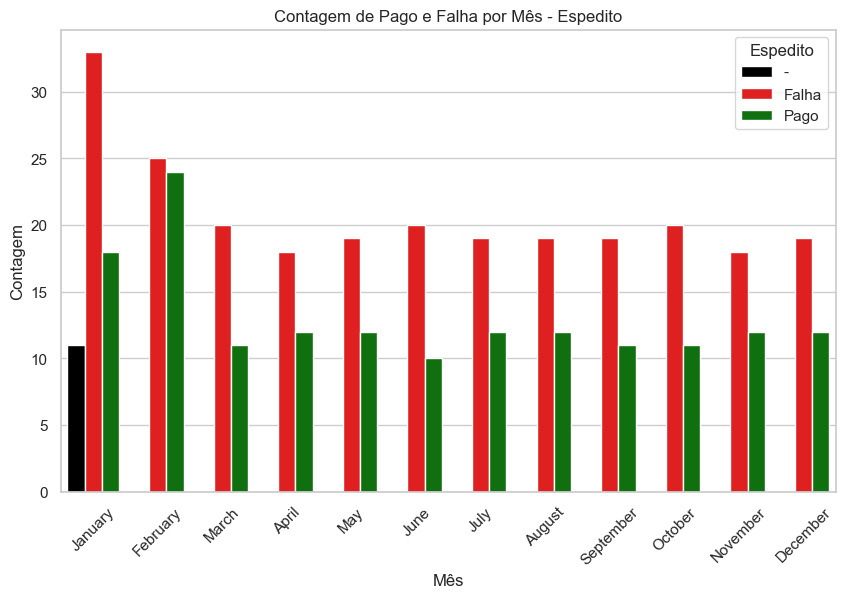

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Usando o Seaborn para criar o gráfico de barras
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

cores_personalizadas = {
    '-': 'black',
    'Pago': 'green', 
    'Falha': 'red'}
# Criando o gráfico de barras
sns.countplot(x='Mes', hue='Espedito', data=df_tabela, palette=cores_personalizadas)
plt.xticks(rotation=45)
# Adicionando rótulos e título
plt.xlabel('Mês')
plt.ylabel('Contagem')
plt.title('Contagem de Pago e Falha por Mês - Espedito')

# Exibindo o gráfico
plt.show()

In [89]:
# Contando os registros com base em Ano, Mes e Espedito
contagem_registros = df_tabela.groupby(['Ano', 'Mes', 'Espedito']).size().reset_index(name='Contagem_espedito')
contagem_registros.head()


,Ano,Mes,Espedito,Contagem_espedito
0,2023,April,Falha,18
1,2023,April,Pago,12
2,2023,August,Falha,19
3,2023,August,Pago,12
4,2023,December,Falha,19


In [90]:
# Transformando 'Espedito' em colunas usando pivot
pivoted_df = contagem_registros.pivot(index=['Ano', 'Mes'], columns='Espedito', values='Contagem_espedito').reset_index()

# Preenchendo NaN com 0
pivoted_df = pivoted_df.fillna(0)

pivoted_df['Nome'] = 'Espedito'

pivoted_df.head()

Espedito,Ano,Mes,-,Falha,Pago,Nome
0,2023,April,0.0,18.0,12.0,Espedito
1,2023,August,0.0,19.0,12.0,Espedito
2,2023,December,0.0,19.0,12.0,Espedito
3,2023,February,0.0,25.0,3.0,Espedito
4,2023,January,11.0,13.0,7.0,Espedito


<Figure size 1000x600 with 0 Axes>

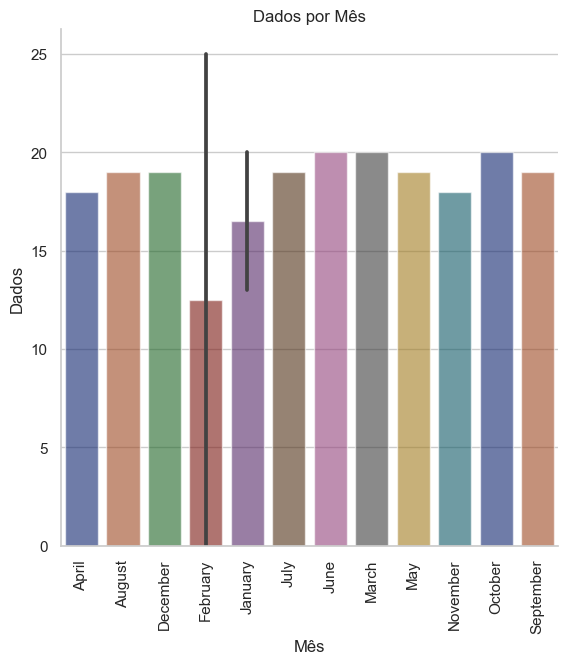

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Usando o Seaborn para criar o gráfico de barras
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Criando o gráfico de barras
sns.catplot(data=pivoted_df, 
            kind="bar",
            x='Mes',
            y='Falha', palette="dark", alpha=.6, height=6
)
# Ajustando a rotação dos rótulos do eixo x
plt.xticks(rotation=90)

# Adicionando rótulos e título
plt.xlabel('Mês')
plt.ylabel('Dados')
plt.title('Dados por Mês')

# Exibindo o gráfico
plt.show()

In [61]:
# # Convertendo os valores para inteiros
pivoted_df[['-', 'Falha', 'Pago']] = pivoted_df[['-', 'Falha', 'Pago']].astype(int)


# Mapeando nomes de todos os meses para números
meses_numeros = {
    'Janeiro': 1, 'Fevereiro': 2, 'Marco': 3, 'Abril': 4, 'Maio': 5, 'Junho': 6,
    'Julho': 7, 'Agosto': 8, 'Setembro': 9, 'Outubro': 10, 'Novembro': 11, 'Dezembro': 12
}
pivoted_df['NumeroMes'] = pivoted_df['Mes'].map(meses_numeros)

# Ordenando o DataFrame com base no número do mês
pivoted_df = pivoted_df.sort_values(by=['Ano','NumeroMes']).reset_index(drop=True)

# Removendo a coluna temporária 'NumeroMes'
pivoted_df = pivoted_df.drop(columns=['NumeroMes'])
pivoted_df

Espedito,Ano,Mes,-,Falha,Pago,Nome
0,2023,Janeiro,11,13,7,Espedito
1,2023,Fevereiro,0,25,3,Espedito
2,2023,Abril,0,18,12,Espedito
3,2023,Maio,0,19,12,Espedito
4,2023,Junho,0,20,10,Espedito
5,2023,Julho,0,19,12,Espedito
6,2023,Agosto,0,19,12,Espedito
7,2023,Setembro,0,19,11,Espedito
8,2023,Outubro,0,20,11,Espedito
9,2023,Novembro,0,18,12,Espedito
